In [68]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Flatten, Dense
from keras.applications import VGG16
from glob import glob
from keras.models import Model

In [3]:
inp_shape= [224, 224]
batch_size= 32

In [4]:
tr_path= r'C:\Users\DIBYOJIT\trimmed Potato disease\train'
test_path= r'C:\Users\DIBYOJIT\trimmed Potato disease\test'
val_path= r'C:\Users\DIBYOJIT\trimmed Potato disease\val'

In [5]:
vgg= VGG16(input_shape= inp_shape+[3,] , weights='imagenet', include_top=False)

In [6]:
vgg.trainable= False

In [7]:
folders= glob('C:/Users/DIBYOJIT/OneDrive/Documents/MOB_IMG/PlantVillage/*')

In [8]:
len(folders)

3

In [9]:
x= Flatten()(vgg.output)

In [10]:
prediction= Dense(len(folders), activation='softmax')(x)

VGG_16= Model(inputs= vgg.input, outputs= prediction)

In [11]:
VGG_16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
VGG_16.compile(
    optimizer= 'adam',
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [13]:
train_gen= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True
)

test_gen= tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

train_datagen= train_gen.flow_from_directory(
   tr_path,
   target_size= (224, 224),
   batch_size= batch_size,
   class_mode='categorical'
)

test_datagen= test_gen.flow_from_directory(
   test_path,
   target_size= (224, 224),
   batch_size= batch_size,
   class_mode='categorical'
)

Found 2152 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.


In [82]:
train_datagen.next()

(array([[[[0.67879516, 0.670952  , 0.725854  ],
          [0.6724053 , 0.66456217, 0.7194642 ],
          [0.6682609 , 0.66041774, 0.7153197 ],
          ...,
          [0.731219  , 0.7222164 , 0.7441432 ],
          [0.72933334, 0.71825856, 0.74432975],
          [0.7259409 , 0.7141762 , 0.74187607]],
 
         [[0.6671047 , 0.6592616 , 0.71416354],
          [0.6579084 , 0.65006524, 0.7049672 ],
          [0.65376395, 0.6459208 , 0.7008228 ],
          ...,
          [0.7233802 , 0.7143753 , 0.7363067 ],
          [0.72302616, 0.711949  , 0.7380249 ],
          [0.7201393 , 0.7083746 , 0.7381218 ]],
 
         [[0.6566285 , 0.64878535, 0.70368737],
          [0.64816535, 0.6403222 , 0.69522417],
          [0.6475535 , 0.63971037, 0.6946123 ],
          ...,
          [0.7269309 , 0.71635675, 0.74720657],
          [0.7245759 , 0.713107  , 0.74810123],
          [0.7218112 , 0.71004647, 0.7476089 ]],
 
         ...,
 
         [[0.46180066, 0.537381  , 0.17266478],
          [0.48565

In [14]:
cl_names= ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
cl_names= np.array(cl_names)
cl_names

array(['Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy'], dtype='<U21')

In [15]:
cl_names[train_datagen.labels]

array(['Potato___Early_blight', 'Potato___Early_blight',
       'Potato___Early_blight', ..., 'Potato___healthy',
       'Potato___healthy', 'Potato___healthy'], dtype='<U21')

In [16]:
val_gen= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True
)
val_datagen= val_gen.flow_from_directory(
   val_path,
   target_size= (224, 224),
   batch_size= batch_size,
   class_mode='categorical'
)

Found 2152 images belonging to 3 classes.


In [17]:
vgg16= VGG_16.fit_generator(train_datagen,
                          validation_data= test_datagen,
                          epochs= 10)

C:\Users\DIBYOJIT\AppData\Local\Temp\ipykernel_1816\1943684804.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16= VGG_16.fit_generator(train_datagen,


Epoch 1/10
68/68 [==============================] - 527s 8s/step - loss: 0.6563 - accuracy: 0.7783 - val_loss: 0.2204 - val_accuracy: 0.9317
Epoch 2/10
68/68 [==============================] - 510s 8s/step - loss: 0.2430 - accuracy: 0.9122 - val_loss: 0.1528 - val_accuracy: 0.9545
Epoch 3/10
68/68 [==============================] - 485s 7s/step - loss: 0.2065 - accuracy: 0.9289 - val_loss: 0.1360 - val_accuracy: 0.9545
Epoch 4/10
68/68 [==============================] - 492s 7s/step - loss: 0.1539 - accuracy: 0.9484 - val_loss: 0.1630 - val_accuracy: 0.9359
Epoch 5/10
68/68 [==============================] - 489s 7s/step - loss: 0.1473 - accuracy: 0.9442 - val_loss: 0.0831 - val_accuracy: 0.9763
Epoch 6/10
68/68 [==============================] - 495s 7s/step - loss: 0.1389 - accuracy: 0.9484 - val_loss: 0.1111 - val_accuracy: 0.9582
Epoch 7/10
68/68 [==============================] - 518s 8s/step - loss: 0.1844 - accuracy: 0.9373 - val_loss: 0.1864 - val_accuracy: 0.9233
Epoch 8/10
68

In [18]:
vgg16.history['accuracy'] 

[0.7783457040786743,
 0.9121747016906738,
 0.928903341293335,
 0.9484200477600098,
 0.9442379474639893,
 0.9484200477600098,
 0.9372676610946655,
 0.9521375298500061,
 0.9632899761199951,
 0.9609665274620056]

In [20]:
pred= VGG_16.predict(val_datagen)

68/68 [==============================] - 252s 4s/step


In [21]:
scores= VGG_16.evaluate(val_datagen)
scores

68/68 [==============================] - 234s 3s/step - loss: 0.0885 - accuracy: 0.9647


[0.08851341158151627, 0.964684009552002]

In [22]:
acc= vgg16.history['accuracy']
val_acc= vgg16.history['val_accuracy']
loss= vgg16.history['loss']
val_loss= vgg16.history['val_loss']

In [23]:
plt.style.use('dark_background')

Text(0.5, 1.0, 'training and validation loss')

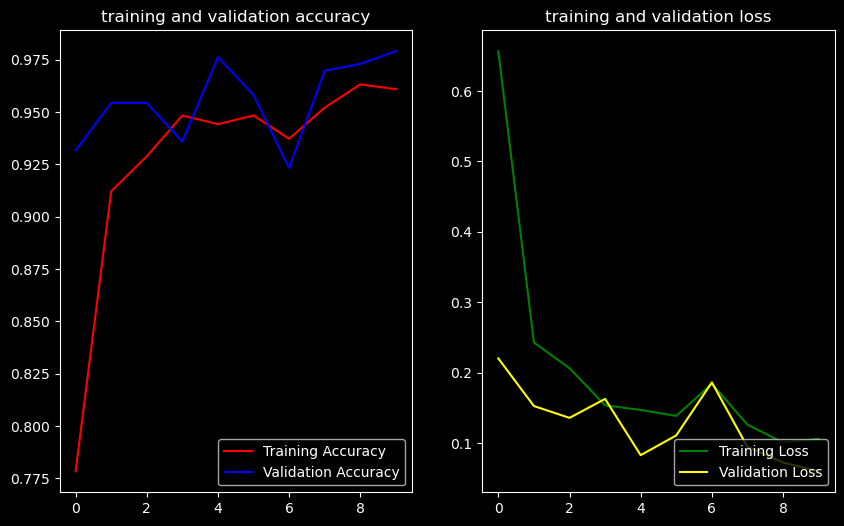

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label= "Training Accuracy", color='red')
plt.plot(range(10), val_acc, label= "Validation Accuracy", color='blue')
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(10), loss, label= "Training Loss", color='green')
plt.plot(range(10), val_loss, label= "Validation Loss", color='yellow')
plt.legend(loc="lower right")
plt.title("training and validation loss")

In [25]:
ypred= [np.argmax(y) for y in pred]
ypred

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [26]:
ypred= np.array(ypred)
ypred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [27]:
for  labels in ypred:
        print(cl_names[labels])

Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___healthy
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___healthy
Potato___Late_blight
Potato___healthy
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___E

In [28]:
from keras.applications import InceptionV3

In [29]:
inc_v3= InceptionV3(input_shape= inp_shape + [3,], weights='imagenet', include_top= False)

In [30]:
inc_v3.trainable= False

In [31]:
y= Flatten()(inc_v3.output)

In [32]:
pred= Dense(len(folders), activation='softmax')(y)

model= Model(inputs= inc_v3.input, outputs= pred)

In [33]:
inc_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
len(train_datagen)

68

In [45]:
inception_v3= model.fit(train_datagen,
                                  validation_data= val_datagen,
                                  epochs=10, )

Epoch 1/10
68/68 [==============================] - 141s 2s/step - loss: 0.4796 - accuracy: 0.9442 - val_loss: 0.3985 - val_accuracy: 0.9484
Epoch 2/10
68/68 [==============================] - 139s 2s/step - loss: 0.6831 - accuracy: 0.9294 - val_loss: 0.2801 - val_accuracy: 0.9586
Epoch 3/10
68/68 [==============================] - 523s 8s/step - loss: 0.4453 - accuracy: 0.9517 - val_loss: 0.3799 - val_accuracy: 0.9517
Epoch 4/10
68/68 [==============================] - 135s 2s/step - loss: 0.4880 - accuracy: 0.9414 - val_loss: 0.3565 - val_accuracy: 0.9493
Epoch 5/10
68/68 [==============================] - 135s 2s/step - loss: 0.3737 - accuracy: 0.9577 - val_loss: 0.2970 - val_accuracy: 0.9610
Epoch 6/10
68/68 [==============================] - 137s 2s/step - loss: 0.6369 - accuracy: 0.9359 - val_loss: 0.3662 - val_accuracy: 0.9582
Epoch 7/10
68/68 [==============================] - 148s 2s/step - loss: 0.5350 - accuracy: 0.9466 - val_loss: 0.7285 - val_accuracy: 0.9294
Epoch 8/10
68

In [46]:
img_predict= model.predict(test_datagen)
img_predict

68/68 [==============================] - 64s 943ms/step


array([[4.8328988e-05, 3.3546425e-02, 9.6640521e-01],
       [9.9999988e-01, 1.6659463e-07, 4.1424436e-18],
       [1.0000000e+00, 5.8899528e-35, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.1637469e-24, 0.0000000e+00],
       [1.0000000e+00, 3.3961022e-25, 0.0000000e+00],
       [1.4826811e-23, 1.0000000e+00, 1.7672248e-26]], dtype=float32)

In [47]:
inc_scores= model.evaluate(test_datagen)
inc_scores

68/68 [==============================] - 66s 962ms/step - loss: 0.1659 - accuracy: 0.9768


[0.16592663526535034, 0.9767658114433289]

In [74]:
!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


In [48]:
acc2= inception_v3.history['accuracy']
val_acc2= inception_v3.history['val_accuracy']
loss2= inception_v3.history['loss']
val_loss2= inception_v3.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

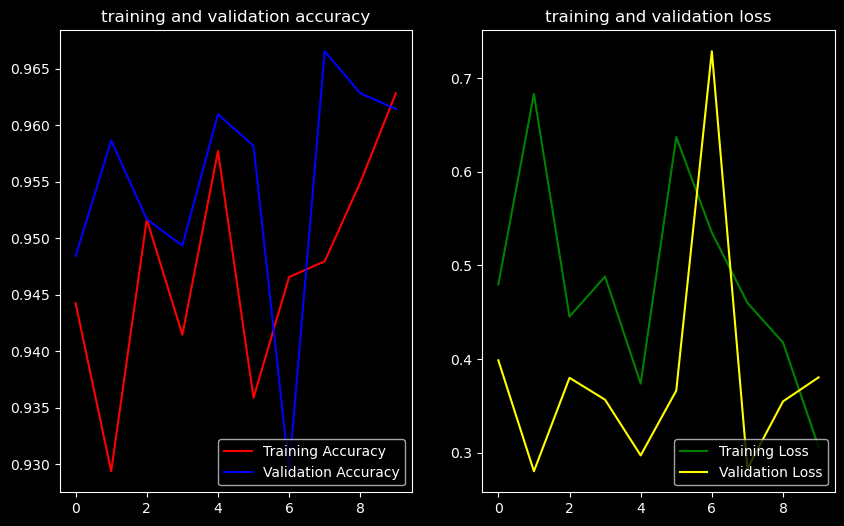

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(10), acc2, label= "Training Accuracy", color='red')
plt.plot(range(10), val_acc2, label= "Validation Accuracy", color='blue')
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(10), loss2, label= "Training Loss", color='green')
plt.plot(range(10), val_loss2, label= "Validation Loss", color='yellow')
plt.legend(loc="lower right")
plt.title("training and validation loss")

In [50]:
pred_y= [np.argmax(y) for y in img_predict ]
pred_y

[2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,


In [51]:
for label_names in pred_y:
    print(cl_names[label_names])

Potato___healthy
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight


In [52]:
data= tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/DIBYOJIT/OneDrive/Documents/MOB_IMG/PlantVillage',
    shuffle=True,
    image_size=inp_shape,
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [53]:
for image_batch, label_batch in data.take(2):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[0 1 2 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 2 1 0 1 0 1 0 1 0 0 1 0 0 0]
(32, 224, 224, 3)
[0 0 0 0 0 0 0 0 2 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 2 0 1 0 1 0 1 0]


In [54]:
plt.style.use('dark_background')

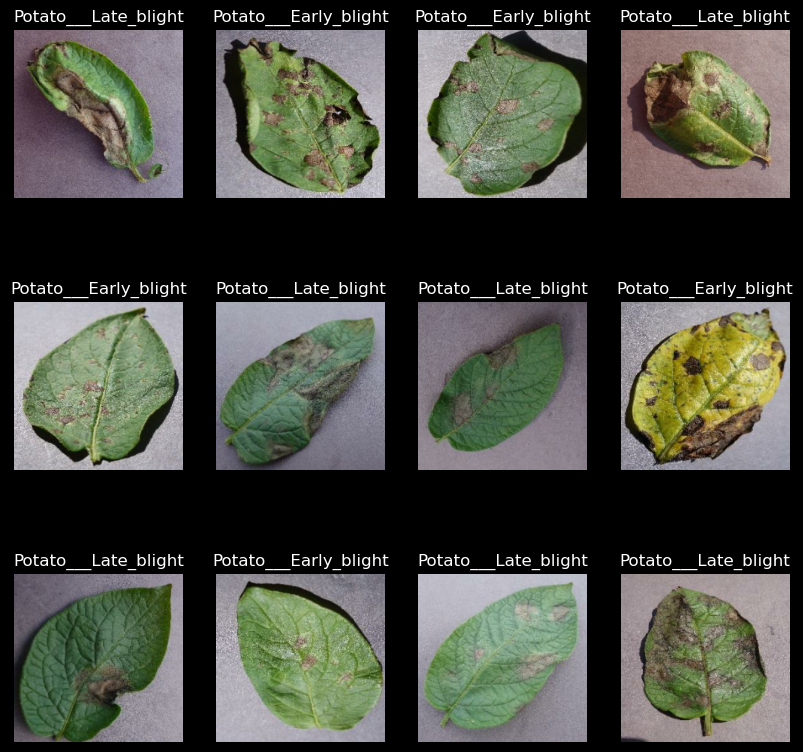

In [55]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("int"))
        plt.title(cl_names[label_batch[i]])
        plt.axis("off")

In [57]:
for image_batch, label_batch in data.take(1):
    batch_prediction= model.predict(image_batch)
    print(batch_prediction[0])

1/1 [==============================] - 1s 968ms/step
[1. 0. 0.]


first image to predict
first's image actual label: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
[1. 0. 0.]
0
predicted label : Potato___Early_blight


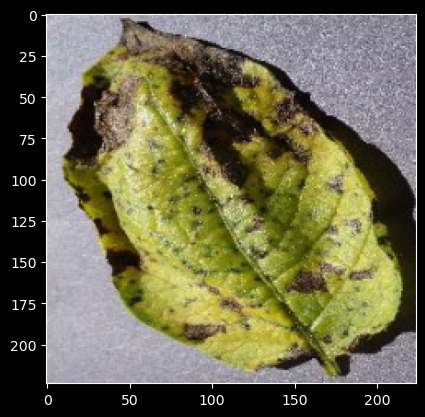

In [56]:
for image_batch, label_batch in data.take(1):
    first_image= image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first's image actual label:", cl_names[first_label])
    batch_prediction= model.predict(image_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("predicted label :", cl_names[np.argmax(batch_prediction[0])])

In [58]:
def predict(model, img):
    for i in range(9):
        img_array= tf.keras.preprocessing.image.img_to_array(image[i].numpy())
        img_array= np.expand_dims(img_array, 0)
        predictions= model.predict(img_array)
        predicted_class= cl_names[np.argmax(predictions[0])]
        return predicted_class

1/1 [==============================] - 0s 87ms/step


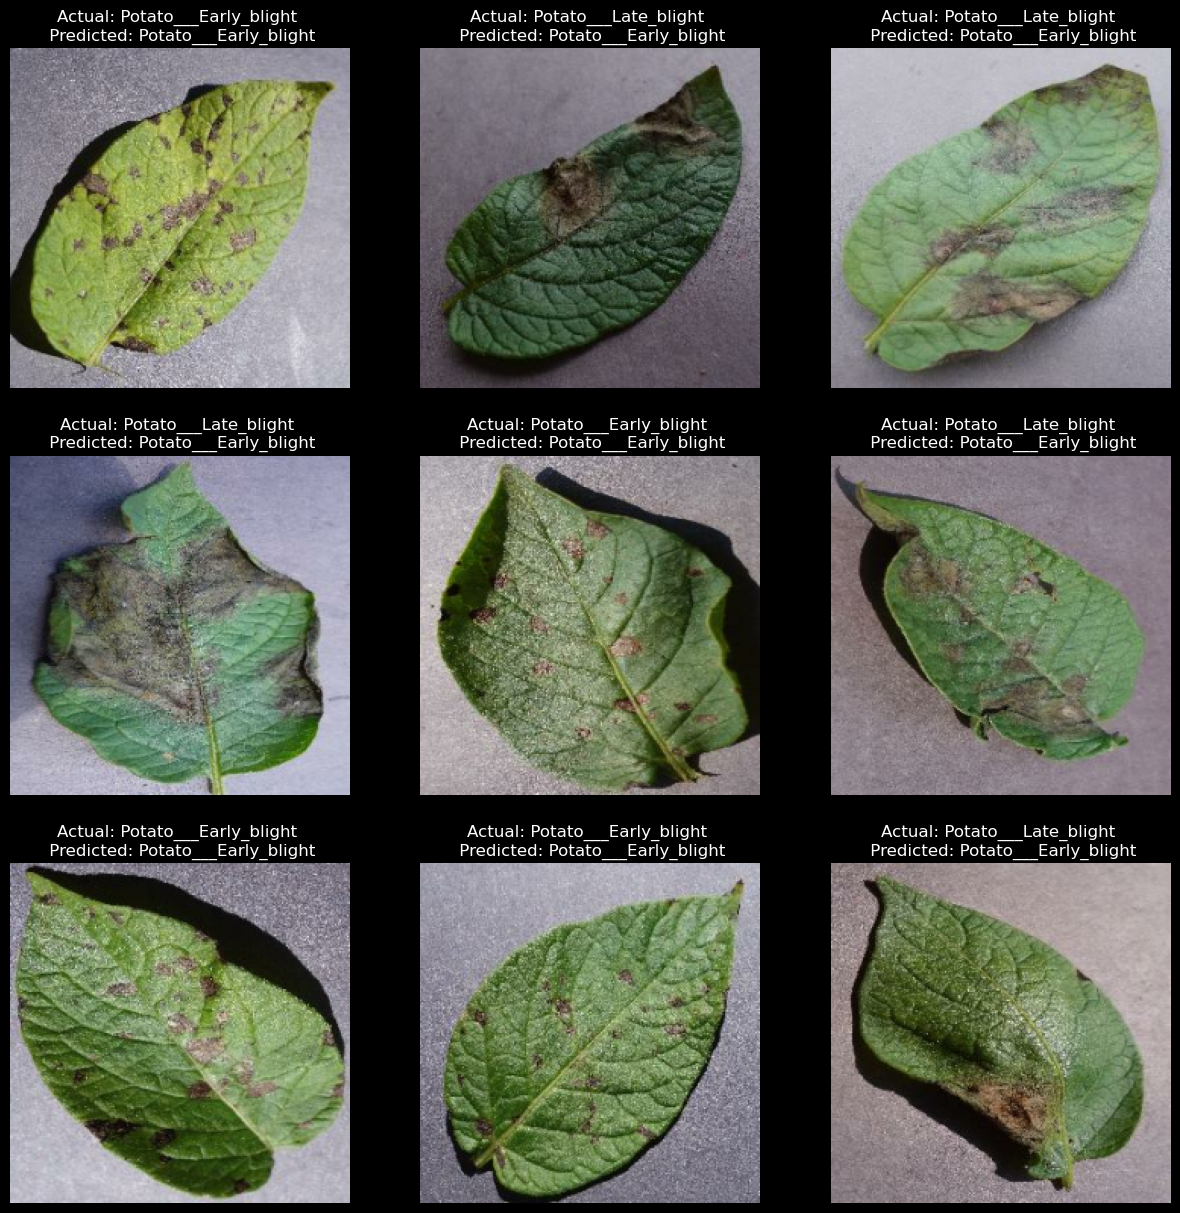

In [60]:
plt.figure(figsize=(15,15))
for image, label in data.take(2):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class= predict(model, image[i].numpy())
        actual_class= cl_names[label[i]]
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}")
        plt.axis("off")

1/1 [==============================] - 0s 146ms/step


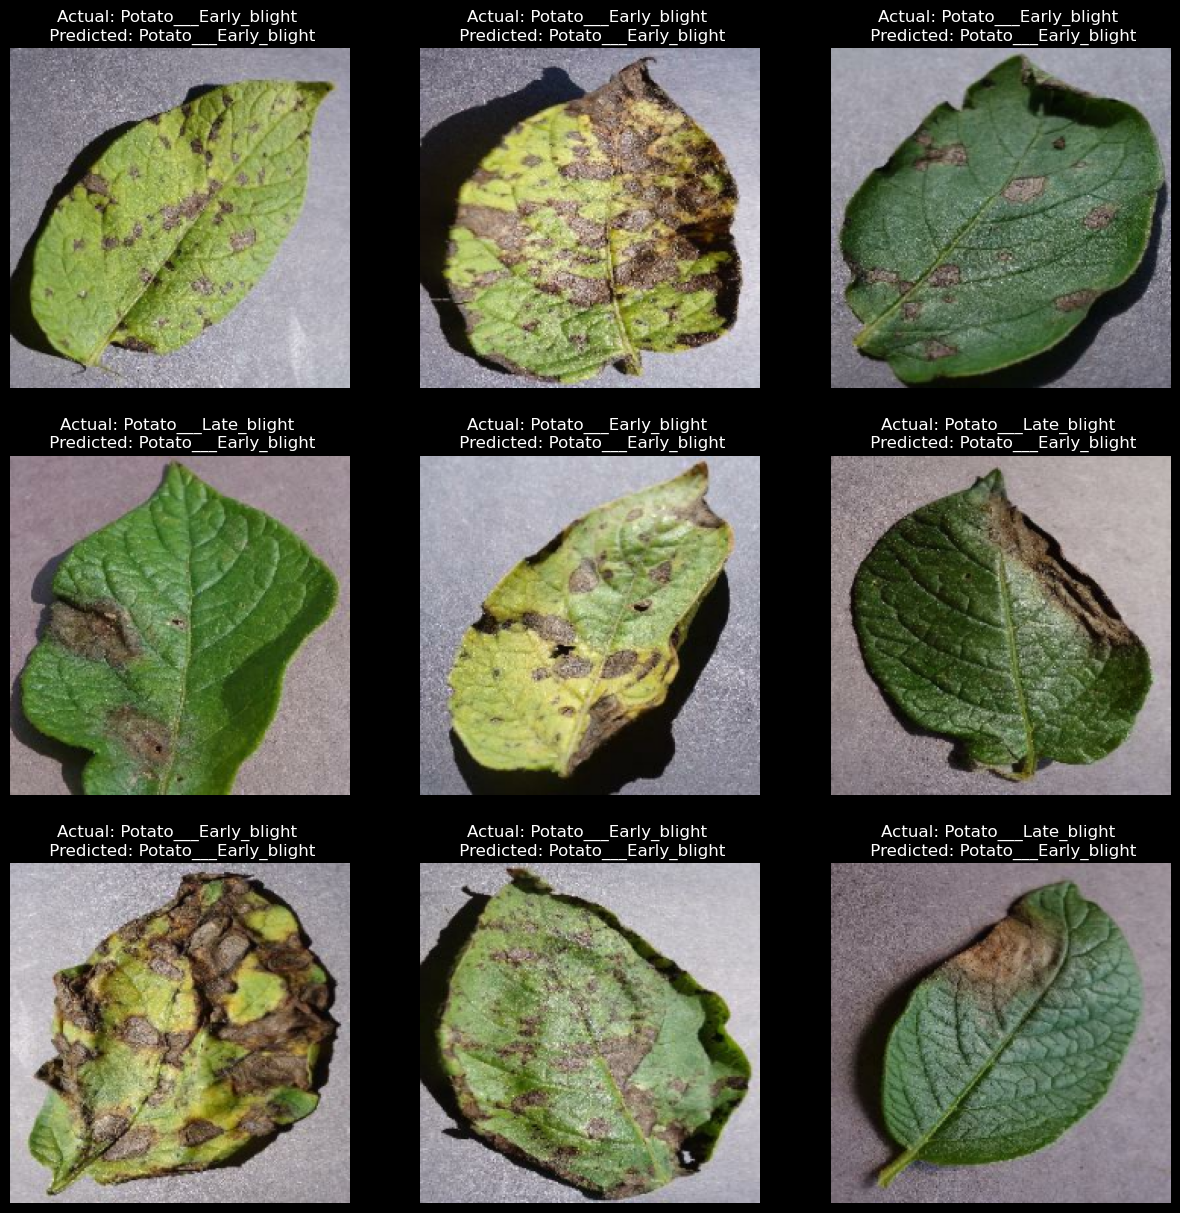

In [61]:
plt.figure(figsize=(15,15))
for image, label in data.take(2):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class= predict(VGG_16, image[i].numpy())
        actual_class= cl_names[label[i]]
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}")
        plt.axis("off")